In [ ]:
from google.colab import drive

# Kết nối Google Drive
drive.mount('/content/drive/')

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


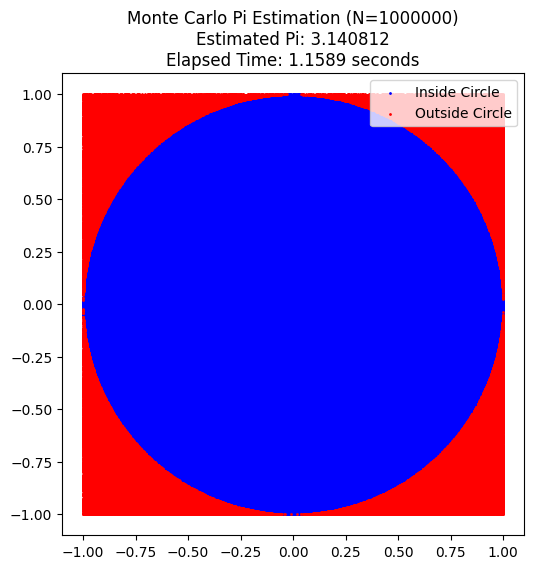

Elapsed Time: 1.1589 seconds


In [ ]:
import random
import matplotlib.pyplot as plt
import time

def monte_carlo_pi(num_points):
    inside_x = []
    inside_y = []
    outside_x = []
    outside_y = []
    inside_circle = 0

    for _ in range(num_points):
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)
        if x**2 + y**2 <= 1:
            inside_circle += 1
            inside_x.append(x)
            inside_y.append(y)
        else:
            outside_x.append(x)
            outside_y.append(y)

    pi_estimate = (inside_circle / num_points) * 4
    return pi_estimate, inside_x, inside_y, outside_x, outside_y

# Hàm đo thời gian chạy
def measure_time(num_points):
    start_time = time.time()  # Bắt đầu đo thời gian
    pi_estimate, inside_x, inside_y, outside_x, outside_y = monte_carlo_pi(num_points)
    end_time = time.time()  # Kết thúc đo thời gian

    elapsed_time = end_time - start_time  # Thời gian đã trôi qua
    return pi_estimate, inside_x, inside_y, outside_x, outside_y, elapsed_time

# Số lượng điểm
num_points = 1000000

# Đo thời gian và thực hiện tính toán
pi_estimate, inside_x, inside_y, outside_x, outside_y, elapsed_time = measure_time(num_points)

# Vẽ biểu đồ
plt.figure(figsize=(6,6))
plt.scatter(inside_x, inside_y, color='blue', s=1, label='Inside Circle')
plt.scatter(outside_x, outside_y, color='red', s=1, label='Outside Circle')
plt.title(f"Monte Carlo Pi Estimation (N={num_points})\nEstimated Pi: {pi_estimate}\nElapsed Time: {elapsed_time:.4f} seconds")
plt.gca().set_aspect('equal')  # Đảm bảo tỷ lệ x:y = 1:1
plt.legend()
plt.show()

# Hiển thị thời gian chạy
print(f"Elapsed Time: {elapsed_time:.4f} seconds")


In [ ]:
import random
import threading
import time
import matplotlib.pyplot as plt

# Hàm sinh điểm ngẫu nhiên và kiểm tra có bao nhiêu điểm trong hình tròn
def monte_carlo_pi_thread(num_points, results, index):
    inside_circle = 0
    inside_x = []
    inside_y = []
    outside_x = []
    outside_y = []

    for _ in range(num_points):
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)
        if x**2 + y**2 <= 1:
            inside_circle += 1
            inside_x.append(x)
            inside_y.append(y)
        else:
            outside_x.append(x)
            outside_y.append(y)

    # Lưu kết quả vào danh sách dùng chung
    results[index] = (inside_circle, inside_x, inside_y, outside_x, outside_y)

# Hàm sử dụng đa luồng
def monte_carlo_multithread(num_points, num_threads):
    threads = []
    results = [None] * num_threads
    points_per_thread = num_points // num_threads

    # Tạo và chạy các thread
    for i in range(num_threads):
        thread = threading.Thread(target=monte_carlo_pi_thread, args=(points_per_thread, results, i))
        threads.append(thread)
        thread.start()

    # Chờ tất cả các thread hoàn thành
    for thread in threads:
        thread.join()

    # Tổng hợp kết quả từ các thread
    total_inside_circle = 0
    inside_x_all = []
    inside_y_all = []
    outside_x_all = []
    outside_y_all = []

    for result in results:
        inside_circle, inside_x, inside_y, outside_x, outside_y = result
        total_inside_circle += inside_circle
        inside_x_all.extend(inside_x)
        inside_y_all.extend(inside_y)
        outside_x_all.extend(outside_x)
        outside_y_all.extend(outside_y)

    # Tính toán giá trị Pi
    pi_estimate = (total_inside_circle / num_points) * 4
    return pi_estimate, inside_x_all, inside_y_all, outside_x_all, outside_y_all

# Hàm đo thời gian
def measure_time_multithread(num_points, num_threads):
    start_time = time.time()  # Bắt đầu đo thời gian
    pi_estimate, inside_x_all, inside_y_all, outside_x_all, outside_y_all = monte_carlo_multithread(num_points, num_threads)
    end_time = time.time()  # Kết thúc đo thời gian

    elapsed_time = end_time - start_time  # Thời gian đã trôi qua
    return pi_estimate, inside_x_all, inside_y_all, outside_x_all, outside_y_all, elapsed_time

# Tham số
num_points = 1000000  # Tổng số điểm
num_threads = 10      # Số lượng luồng (threads)

# Đo thời gian và thực hiện tính toán
pi_estimate, inside_x_all, inside_y_all, outside_x_all, outside_y_all, elapsed_time = measure_time_multithread(num_points, num_threads)

# Vẽ biểu đồ
plt.figure(figsize=(6,6))
plt.scatter(inside_x_all, inside_y_all, color='blue', s=1, label='Inside Circle')
plt.scatter(outside_x_all, outside_y_all, color='red', s=1, label='Outside Circle')
plt.title(f"Monte Carlo Pi Estimation (N={num_points}, Threads={num_threads})\nEstimated Pi: {pi_estimate}\nElapsed Time: {elapsed_time:.4f} seconds")
plt.gca().set_aspect('equal')
plt.legend()
plt.show()

# Hiển thị thời gian chạy
print(f"Estimated Pi: {pi_estimate}")
print(f"Elapsed Time: {elapsed_time:.4f} seconds")


In [ ]:
import numpy as np

def generate_random_matrix(N, M, filename):
    # Tạo ma trận ngẫu nhiên
    matrix = np.random.rand(N, M)

    # Ghi ma trận vào tập tin
    np.savetxt(filename, matrix, fmt='%.6f')

# Thay đổi giá trị N, M và filename ở đây
N = 1000  # Số dòng
M = 1000  # Số cột
filename = '/content/drive/MyDrive/Colab/MATMUL/matrixA.txt'  # Đường dẫn lưu vào Drive

generate_random_matrix(N, M, filename)

print(f"Tập tin đã được lưu vào: {filename}")


Tập tin đã được lưu vào: /content/drive/MyDrive/Colab/MATMUL/matrixA.txt


In [ ]:
import time
import os
import psutil

def load_matrix(filename):
    with open(filename, 'r') as f:
        return [list(map(float, line.split())) for line in f]

def save_matrix(matrix, filename):
    with open(filename, 'w') as f:
        for row in matrix:
            f.write(' '.join(map(str, row)) + '\n')

def matrix_multiply(matrix1, matrix2):
    # Kiểm tra kích thước
    if len(matrix1[0]) != len(matrix2):
        raise ValueError("Số cột của ma trận 1 phải bằng số dòng của ma trận 2.")

    # Khởi tạo ma trận kết quả
    result = [[0] * len(matrix2[0]) for _ in range(len(matrix1))]

    # Nhân ma trận
    for i in range(len(matrix1)):
        for j in range(len(matrix2[0])):
            for k in range(len(matrix2)):
                result[i][j] += matrix1[i][k] * matrix2[k][j]
    return result

def main(filename1, filename2, filename3):
    # Đo thời gian bắt đầu
    start_time = time.time()

    # Tải ma trận từ tập tin
    matrix1 = load_matrix(filename1)
    matrix2 = load_matrix(filename2)

    # Nhân hai ma trận
    result_matrix = matrix_multiply(matrix1, matrix2)

    # Lưu kết quả vào tập tin
    save_matrix(result_matrix, filename3)

    # Đo thời gian kết thúc
    end_time = time.time()
    elapsed_time = end_time - start_time

    # Tính thời gian chạy
    minutes, seconds = divmod(elapsed_time, 60)

    # Tính bộ nhớ cần thiết
    memory_usage = psutil.Process(os.getpid()).memory_info().rss / (1024 ** 2)  # Chuyển đổi sang MB

    print(f"Kết quả đã được lưu vào: {filename3}")
    print(f"Thời gian chạy: {int(minutes)} phút {int(seconds)} giây")
    print(f"Bộ nhớ sử dụng: {memory_usage:.2f} MB")

# Đường dẫn tới các tập tin ma trận
filename1 = '/content/drive/MyDrive/Colab/MATMUL/matrixA.txt'  # Tập tin ma trận 1
filename2 = '/content/drive/MyDrive/Colab/MATMUL/matrixB.txt'  # Tập tin ma trận 2
filename3 = '/content/drive/MyDrive/Colab/MATMUL/matrixC.txt'  # Tập tin lưu kết quả

main(filename1, filename2, filename3)


Kết quả đã được lưu vào: /content/drive/MyDrive/Colab/MATMUL/matrixC.txt
Thời gian chạy: 5 phút 47 giây
Bộ nhớ sử dụng: 1381.18 MB


In [ ]:
import time
import os
import psutil
import threading

def load_matrix(filename):
    with open(filename, 'r') as f:
        return [list(map(float, line.split())) for line in f]

def save_matrix(matrix, filename):
    with open(filename, 'w') as f:
        for row in matrix:
            f.write(' '.join(map(str, row)) + '\n')

# Nhân một hàng của ma trận
def multiply_row(row, matrix2, result, row_index):
    for j in range(len(matrix2[0])):
        for k in range(len(matrix2)):
            result[row_index][j] += row[k] * matrix2[k][j]

def matrix_multiply(matrix1, matrix2):
    # Kiểm tra kích thước
    if len(matrix1[0]) != len(matrix2):
        raise ValueError("Số cột của ma trận 1 phải bằng số dòng của ma trận 2.")

    # Khởi tạo ma trận kết quả
    result = [[0] * len(matrix2[0]) for _ in range(len(matrix1))]
    threads = []

    # Nhân ma trận
    for i in range(len(matrix1)):
        thread = threading.Thread(target=multiply_row, args=(matrix1[i], matrix2, result, i))
        threads.append(thread)
        thread.start()

    # Chờ tất cả các luồng hoàn thành
    for thread in threads:
        thread.join()

    return result

def main(filename1, filename2, filename3):
    # Đo thời gian bắt đầu
    start_time = time.time()

    # Tải ma trận từ tập tin
    matrix1 = load_matrix(filename1)
    matrix2 = load_matrix(filename2)

    # Nhân hai ma trận
    result_matrix = matrix_multiply(matrix1, matrix2)

    # Lưu kết quả vào tập tin
    save_matrix(result_matrix, filename3)

    # Đo thời gian kết thúc
    end_time = time.time()
    elapsed_time = end_time - start_time

    # Tính thời gian chạy
    minutes, seconds = divmod(elapsed_time, 60)

    # Tính bộ nhớ cần thiết
    memory_usage = psutil.Process(os.getpid()).memory_info().rss / (1024 ** 2)  # Chuyển đổi sang MB

    print(f"Kết quả đã được lưu vào: {filename3}")
    print(f"Thời gian chạy: {int(minutes)} phút {int(seconds)} giây")
    print(f"Bộ nhớ sử dụng: {memory_usage:.2f} MB")

# Đường dẫn tới các tập tin ma trận
filename1 = '/content/drive/MyDrive/Colab/MATMUL/matrixA.txt'  # Tập tin ma trận 1
filename2 = '/content/drive/MyDrive/Colab/MATMUL/matrixB.txt'  # Tập tin ma trận 2
filename3 = '/content/drive/MyDrive/Colab/MATMUL/matrixE.txt'  # Tập tin lưu kết quả

main(filename1, filename2, filename3)


Kết quả đã được lưu vào: /content/drive/MyDrive/Colab/MATMUL/matrixE.txt
Thời gian chạy: 4 phút 33 giây
Bộ nhớ sử dụng: 216.78 MB


In [ ]:
import numpy as np
import time
import os
import psutil

def load_matrix(filename):
    return np.loadtxt(filename)

def save_matrix(matrix, filename):
    np.savetxt(filename, matrix, fmt='%.6f')

def main(filename1, filename2, filename3):
    # Đo thời gian bắt đầu
    start_time = time.time()

    # Tải ma trận từ tập tin
    matrix1 = load_matrix(filename1)
    matrix2 = load_matrix(filename2)

    # Kiểm tra kích thước
    if matrix1.shape[1] != matrix2.shape[0]:
        raise ValueError("Số cột của ma trận 1 phải bằng số dòng của ma trận 2.")

    # Nhân hai ma trận
    result_matrix = np.dot(matrix1, matrix2)

    # Lưu kết quả vào tập tin
    save_matrix(result_matrix, filename3)

    # Đo thời gian kết thúc
    end_time = time.time()
    elapsed_time = end_time - start_time

    # Tính thời gian chạy
    minutes, seconds = divmod(elapsed_time, 60)

    # Tính bộ nhớ cần thiết
    memory_usage = psutil.Process(os.getpid()).memory_info().rss / (1024 ** 2)  # Chuyển đổi sang MB

    print(f"Kết quả đã được lưu vào: {filename3}")
    print(f"Thời gian chạy: {int(minutes)} phút {int(seconds)} giây")
    print(f"Bộ nhớ sử dụng: {memory_usage:.2f} MB")

# Đường dẫn tới các tập tin ma trận
filename1 = '/content/drive/MyDrive/Colab/MATMUL/matrixA.txt'  # Tập tin ma trận 1
filename2 = '/content/drive/MyDrive/Colab/MATMUL/matrixB.txt'  # Tập tin ma trận 2
filename3 = '/content/drive/MyDrive/Colab/MATMUL/matrixD.txt'  # Tập tin lưu kết quả

main(filename1, filename2, filename3)


Kết quả đã được lưu vào: /content/drive/MyDrive/Colab/MATMUL/matrixD.txt
Thời gian chạy: 0 phút 0 giây
Bộ nhớ sử dụng: 1384.27 MB


In [ ]:
import time
import os
import psutil
import tensorflow as tf

def load_matrix(filename):
    with open(filename, 'r') as f:
        return [list(map(float, line.split())) for line in f]

def save_matrix(matrix, filename):
    with open(filename, 'w') as f:
        for row in matrix:
            f.write(' '.join(map(str, row)) + '\n')

def main(filename1, filename2, filename3):
    # Đo thời gian bắt đầu
    start_time = time.time()

    # Tải ma trận từ tập tin
    matrix1 = load_matrix(filename1)
    matrix2 = load_matrix(filename2)

    # Chuyển đổi danh sách thành tensor
    tensor1 = tf.constant(matrix1, dtype=tf.float32)
    tensor2 = tf.constant(matrix2, dtype=tf.float32)

    # Nhân hai ma trận
    result_tensor = tf.matmul(tensor1, tensor2)

    # Chuyển đổi kết quả về danh sách
    result_matrix = result_tensor.numpy().tolist()

    # Lưu kết quả vào tập tin
    save_matrix(result_matrix, filename3)

    # Đo thời gian kết thúc
    end_time = time.time()
    elapsed_time = end_time - start_time

    # Tính thời gian chạy
    minutes, seconds = divmod(elapsed_time, 60)

    # Tính bộ nhớ cần thiết
    memory_usage = psutil.Process(os.getpid()).memory_info().rss / (1024 ** 2)  # Chuyển đổi sang MB

    print(f"Kết quả đã được lưu vào: {filename3}")
    print(f"Thời gian chạy: {int(minutes)} phút {int(seconds)} giây")
    print(f"Bộ nhớ sử dụng: {memory_usage:.2f} MB")

# Đường dẫn tới các tập tin ma trận
filename1 = '/content/drive/MyDrive/Colab/MATMUL/matrixA.txt'  # Tập tin ma trận 1
filename2 = '/content/drive/MyDrive/Colab/MATMUL/matrixB.txt'  # Tập tin ma trận 2
filename3 = '/content/drive/MyDrive/Colab/MATMUL/matrix_TF.txt'  # Tập tin lưu kết quả
main(filename1, filename2, filename3)


Kết quả đã được lưu vào: /content/drive/MyDrive/Colab/MATMUL/matrix_TF.txt
Thời gian chạy: 0 phút 2 giây
Bộ nhớ sử dụng: 1384.27 MB


In [ ]:
import time
import os
import psutil
import torch

def load_matrix(filename):
    with open(filename, 'r') as f:
        return [list(map(float, line.split())) for line in f]

def save_matrix(matrix, filename):
    with open(filename, 'w') as f:
        for row in matrix:
            f.write(' '.join(map(str, row)) + '\n')

def main(filename1, filename2, filename3):
    # Đo thời gian bắt đầu
    start_time = time.time()

    # Tải ma trận từ tập tin
    matrix1 = load_matrix(filename1)
    matrix2 = load_matrix(filename2)

    # Chuyển đổi danh sách thành tensor
    tensor1 = torch.tensor(matrix1, dtype=torch.float32)
    tensor2 = torch.tensor(matrix2, dtype=torch.float32)

    # Nhân hai ma trận
    result_tensor = torch.mm(tensor1, tensor2)

    # Chuyển đổi kết quả về danh sách
    result_matrix = result_tensor.numpy().tolist()

    # Lưu kết quả vào tập tin
    save_matrix(result_matrix, filename3)

    # Đo thời gian kết thúc
    end_time = time.time()
    elapsed_time = end_time - start_time

    # Tính thời gian chạy
    minutes, seconds = divmod(elapsed_time, 60)

    # Tính bộ nhớ cần thiết
    memory_usage = psutil.Process(os.getpid()).memory_info().rss / (1024 ** 2)  # Chuyển đổi sang MB

    print(f"Kết quả đã được lưu vào: {filename3}")
    print(f"Thời gian chạy: {int(minutes)} phút {int(seconds)} giây")
    print(f"Bộ nhớ sử dụng: {memory_usage:.2f} MB")

# Đường dẫn tới các tập tin ma trận
filename1 = '/content/drive/MyDrive/Colab/MATMUL/matrixA.txt'  # Tập tin ma trận 1
filename2 = '/content/drive/MyDrive/Colab/MATMUL/matrixB.txt'  # Tập tin ma trận 2
filename3 = '/content/drive/MyDrive/Colab/MATMUL/matrix_PyTorch.txt'  # Tập tin lưu kết quả

main(filename1, filename2, filename3)


Kết quả đã được lưu vào: /content/drive/MyDrive/Colab/MATMUL/matrix_PyTorch.txt
Thời gian chạy: 0 phút 2 giây
Bộ nhớ sử dụng: 1384.27 MB
